# How do jobs and their skills pay for Data Roles?

### Methodology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualise for highest paying skills, and most in-demand jobs

In [20]:
# Importing libraries
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # convert skill_list from str to list

In [21]:
# filter for jobs in the UK, and drop any columns that have NaN values for salary, as they are unuseable.
df_uk = df[(df['job_country'] == 'United Kingdom')].dropna(subset=['salary_year_avg']).copy()

In [27]:
# convert 'salary_year_avg' from usd to gbp, as we are studying data in the united kingdom
df_uk['salary_year_avg'] = df_uk['salary_year_avg'] * 0.77 # current exchange rate

In [28]:
# set the desired amount of top roles to analyse as a variable to easily change.
desired_job_no = 6
# find the top mentioned job titles by counting them up, and find the index' of the top 'desired_job_no', and convert to list
job_titles = df_uk['job_title_short'].value_counts().index[:desired_job_no].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [29]:
# filter the data frame to only include data from the top specified roles
df_uk_top = df_uk[df_uk['job_title_short'].isin(job_titles)]

In [30]:
# to sort the plots by ascending order, we will need to group by their medians. we then sort the values and extract their index
job_order = df_uk_top.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

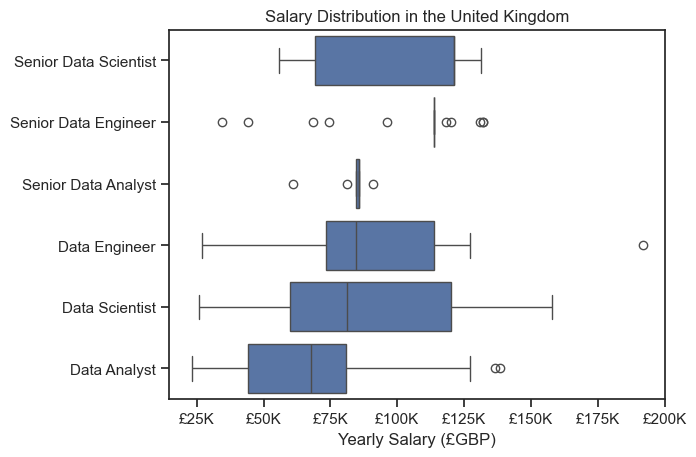

In [31]:
sns.boxplot(data=df_uk_top, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style="ticks")

plt.title('Salary Distribution in the United Kingdom')
plt.xlabel('Yearly Salary (£GBP)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'£{int(x/1000)}K'))
plt.show()